# Cài đặt thư viện

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk import bigrams , unique_list
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount("/content/Mydrive")

Mounted at /content/Mydrive


In [ ]:
import numpy as np
import pandas as pd

# Tiền xử lý dữ liệu bao gồm :

1.   Phân tách bộ ngữ liệu thành các câu
2.   Loại bỏ các ký tự đặc biệt của bộ ngữ liệu
3.   Sàn lọc bộ ngữ liệu chỉ lấy các từ thuộc kiểu alpha
4.   Thêm kí tự 's' ở đầu và '/s' ở cuối của mỗi câu



In [ ]:
with open("/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/wiki_train.txt") as data:
     wikitext_2 = data.read()

In [ ]:
wikitext_2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
wikitext_2 = wikitext_2.replace("\n", " ")

In [ ]:
wikitext_2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
wikitext_2= nltk.sent_tokenize(wikitext_2)

KeyboardInterrupt: ignored

In [ ]:
wikitext_2

In [ ]:
import string
wikitext_2 = [sentence.translate(str.maketrans('', '', string.punctuation)) for sentence in wikitext_2]

In [ ]:
wikitext_2

In [ ]:
word_data_wikitext_2= list()
for line in wikitext_2:
    sent = line.split()
    temp =[]
    for word in sent:
        if word.isalpha():
           temp.append(word)
    word_data_wikitext_2.append(' '.join(temp)) 

In [ ]:
word_data_wikitext_2

In [ ]:
word_data_wikitext_2 = list(map(lambda x:'<s>' + " "+ x + " " + '</s>', word_data_wikitext_2))

In [ ]:
# save file.txt 
with open(r'/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/word_data_wikitext_2_train.txt', 'w') as fp:
    for item in word_data_wikitext_2:
        # write each item on a new line
        fp.write("%s\n" % item)

# Tạo Unigram và Bigram

In [ ]:
def load_vocabs(name_file):
  V = None
  with open(name_file, "r") as f:
    V = f.readlines()
    V = list(map(lambda  x:x.strip("\n") , V))
  return V

In [ ]:
new_word_data = load_vocabs("/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/word_data_wikitext_2_train.txt")

In [ ]:
new_word_data

['<s> Valkyria Chronicles III Senjō no Valkyria unk Chronicles Japanese lit </s>',
 '<s> Valkyria of the Battlefield commonly referred to as Valkyria Chronicles III outside Japan is a tactical role playing video game developed by Sega and MediaVision for the PlayStation Portable </s>',
 '<s> Released in January in Japan it is the third game in the Valkyria series </s>',
 '<s> unk the same fusion of tactical and real time gameplay as its predecessors the story runs parallel to the first game and follows the Nameless a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit unk Raven </s>',
 '<s> The game began development in carrying over a large portion of the work done on Valkyria Chronicles II </s>',
 '<s> While it retained the standard features of the series it also underwent multiple adjustments such as making the game more unk for series newcomers </s>',
 '<s> Character designer unk

In [ ]:
#Lấy ra danh sách từ corpus
word_list = list()
for line in new_word_data:
    sent = line.split()
    for word in sent:
        word_list.append(word) 
unique_word_list = unique_list(word_list)

In [ ]:
#Tạo unigram
text = [unique_word_list, word_list]
from nltk.util import ngrams
text_unigrams = [ngrams(sent, 1) for sent in text]
from nltk.lm import NgramCounter
ngram_counts = NgramCounter(text_unigrams)
list_unigram_word =ngram_counts.unigrams
for i in list_unigram_word:
    list_unigram_word[i] = list_unigram_word[i] -1

In [ ]:
list_unigram_word = dict(sorted(list_unigram_word.items()))

In [ ]:
pd_unigram_word = pd.DataFrame.from_dict(list_unigram_word,orient='index' , columns =['Quantity'])

In [ ]:
#Lưu vào unigram đếm được vào file unigram_wikitext_2
pd_unigram_word.to_csv("/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/unigram_wikitext_2" , sep =",")

In [ ]:
#Tạo bigram
from collections import Counter
from nltk.util import ngrams
n_gram = 2
list_bigram_word ={}
for line in new_word_data:
    temp_bigram_count = Counter(ngrams(line.split(), n_gram))
    for i in temp_bigram_count:
        if i not in list_bigram_word:
           list_bigram_word[i] = temp_bigram_count[i]
        else:
           list_bigram_word[i] = list_bigram_word[i] + temp_bigram_count[i]

In [ ]:
list_bigram_word = dict(sorted(list_bigram_word.items()))

# Tải Unigram và Bigram từ file 

In [ ]:
pd_unigram = pd.read_csv("/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/unigram_wikitext_2")

In [ ]:
list_unigram_count_train = pd_unigram.to_dict('split')

In [ ]:
list_unigram_count_data_train = list_unigram_count_train['data']

In [ ]:
list_unigram_count_data_train = dict(list_unigram_count_data_train) #tử điển unigram count

In [ ]:
list_unigram_data_train = list(list_unigram_count_data_train)

In [ ]:
arr_unigram_data_value_train = list(list_unigram_count_data_train.values())

In [ ]:
list_bigram_count_data_train =list_bigram_word #từ điển bigram_count

In [ ]:
list_bigram_data_train = list(list_bigram_count_data_train) #danh sách chứa các bigram

In [ ]:
list_w1 = [] #tạo danh sách w'
list_w2 = [] #tạo danh sách w
for bigram in list_bigram_data_train:
    list_w1.append(bigram[0])
    list_w2.append(bigram[1])

# Xây dựng language model (N-gram using Absolute Discounting Smoothing)

In [ ]:
import math
from tqdm import tqdm
word_data_wikitext_2_valid = load_vocabs("/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/word_data_wikitext_2_valid.txt")
word_data_wikitext_2_test  = load_vocabs("/content/Mydrive/MyDrive/CS221 - Xử lý ngôn ngữ tự nhiên/Đồ án NLP/wikitext-2/word_data_wikitext_2_test.txt")

In [ ]:
#tách một wikitext 2 valid thành các bigram 
list_couple_bigram_wikitext_2_valid = []
Number_word_of_valid_data =[]
for line in word_data_wikitext_2_valid[0:200]:
    sent = line.split()
    Number_word_of_valid_data.append(len(sent))
    for i in range(len(sent)-1):
        list_couple_bigram_wikitext_2_valid.append((sent[i] , sent[i+1]))
    list_couple_bigram_wikitext_2_valid.append('\n')  

In [ ]:
sum = 0.0 #tính tổng số lần xuất hiện của tất cả các từ (tập train)
for i in arr_unigram_data_value_train:
    sum = sum +i

In [ ]:
#Tính xác suất của w trong corpus (tập train)
dict_count_probability_Wi = {}
for word in list_unigram_count_data_train:
       dict_count_probability_Wi[word] =list_unigram_count_data_train[word] / sum

In [ ]:
#Tính tổng số lần xuất hiện của w' với toàn bộ V ; V ở đây là toàn bộ tập từ vựng.(tập train)
dict_count_Wi_V = {}
for i in range(len(list_w1)):
    if list_w1[i] not in dict_count_Wi_V:
       dict_count_Wi_V[list_w1[i]] = list_bigram_count_data_train[(list_w1[i] , list_w2[i])]
    else:
       dict_count_Wi_V[list_w1[i]] = dict_count_Wi_V[list_w1[i]] + list_bigram_count_data_train[(list_w1[i] , list_w2[i])]

In [ ]:
#tính số lần xuất hiện của w với w' (count (w',w) >0) hay còn gọi là số lượng (w' , w) đã giảm
dict_appear_Wi ={}
for i in tqdm(range(len(list_w1))):
    if list_bigram_count_data_train[(list_w1[i],list_w2[i])] > 0:
       if list_w1[i] not in dict_appear_Wi:
          dict_appear_Wi[list_w1[i]] = 1
       else:
          dict_appear_Wi[list_w1[i]] =  dict_appear_Wi[list_w1[i]] + 1

100%|██████████| 604455/604455 [00:01<00:00, 597594.14it/s]


In [ ]:
#tính lượng xác suất bù (còn lại) sau khi giảm n w
dict_sum_discounted_count_probability_Wi ={}
for bigram in list_bigram_data_train:
    if bigram[0] not in dict_sum_discounted_count_probability_Wi:
       dict_sum_discounted_count_probability_Wi[bigram[0]] = dict_count_probability_Wi[bigram[1]]
    else:
       dict_sum_discounted_count_probability_Wi[bigram[0]] = dict_sum_discounted_count_probability_Wi[bigram[0]] + dict_count_probability_Wi[bigram[1]]
for i in dict_sum_discounted_count_probability_Wi:
    dict_sum_discounted_count_probability_Wi[i] = 1 - dict_sum_discounted_count_probability_Wi[i]

In [ ]:
#trích lọc các w' đi chung với w thành 1 mảng tập các w
arr =[]
temp = []
for i in tqdm(range(len(list_bigram_data_train)-1)):
    temp.append(list_bigram_data_train[i][1])
    if list_bigram_data_train[i][0] != list_bigram_data_train[i+1][0]:
       arr.append(temp)
       temp =[]

100%|██████████| 604454/604454 [00:01<00:00, 592724.86it/s]


In [ ]:
arr.append(['and' ,'during','incendiary','were']) # bổ sung thêm các w đi với w' cuối cùng

In [ ]:
#hàm tìm các phần tử chưa xuất hiện
def Intersect(temp , train):
    lst = []
    train = set(train)
    lst = [value for value in train if value not in temp]
    return lst

In [ ]:
#tìm các w' ko đi chung với w
new_arr =[]
for i in tqdm(arr):
    lst = Intersect(i , list_unigram_data_train)
    new_arr.append(lst)

100%|██████████| 31691/31691 [08:45<00:00, 60.34it/s] 


In [ ]:
def Test_on_Valid(dict_bigram_proba_wiki_2_train , D):
    arr_proba = []
    temp_proba =[]
    for bigram in tqdm(list_couple_bigram_wikitext_2_valid):
        if  bigram != '\n' and len(bigram) > 1:
            if bigram in list_bigram_data_train:
               temp_proba.append(dict_bigram_proba_wiki_2_train[bigram])
            else:
               temp_proba.append((((D * dict_appear_Wi[bigram[0]])/dict_count_Wi_V[bigram[0]])/dict_sum_discounted_count_probability_Wi[bigram[0]]) * dict_count_probability_Wi[bigram[1]])
        else:
             arr_proba.append(temp_proba)
             temp_proba = []
    perplexity_each_sentence = []
    for proba in tqdm(arr_proba):
        if len(proba) > 0:
           perplexity_each_sentence.append(pow(2 , -(math.log2(np.prod(proba)))/(len(proba)+1)))
    return np.sum(perplexity_each_sentence)/200

In [ ]:
D =[ 0.4 , 0.75 , 0.9]
epoch = 3
arr_perplexity = []
list_dict_bigram_proba_wiki_2_train =[]
for i in tqdm(range(epoch)):
  print("-------Epoch {}---------".format(i+1))
  temp_dict_bigram_proba_wikitext_2_train = {}
  for bigram in tqdm(list_bigram_data_train):
      temp_dict_bigram_proba_wikitext_2_train[bigram] = (list_bigram_count_data_train[bigram] - D[i]) / dict_count_Wi_V[bigram[0]]
  arr_perplexity.append(Test_on_Valid(temp_dict_bigram_proba_wikitext_2_train , D[i]))
  list_dict_bigram_proba_wiki_2_train.append(temp_dict_bigram_proba_wikitext_2_train)      

  0%|          | 0/3 [00:00<?, ?it/s]

-------Epoch 1---------



100%|██████████| 604455/604455 [00:01<00:00, 520316.47it/s]

100%|██████████| 3914/3914 [04:23<00:00, 14.84it/s]

 33%|███▎      | 1/3 [04:25<08:50, 265.01s/it]

-------Epoch 2---------



100%|██████████| 604455/604455 [00:01<00:00, 581678.27it/s]

100%|██████████| 3914/3914 [04:26<00:00, 14.70it/s]

 67%|██████▋   | 2/3 [08:52<04:26, 266.42s/it]

-------Epoch 3---------



100%|██████████| 604455/604455 [00:01<00:00, 559136.13it/s]

100%|██████████| 3914/3914 [04:30<00:00, 14.46it/s]

100%|██████████| 3/3 [13:24<00:00, 268.10s/it]


In [ ]:
print(D)

[0.4, 0.75, 0.9]


In [ ]:
print(arr_perplexity)

[413.42266033747654, 359.3504603751099, 365.4856402798045]


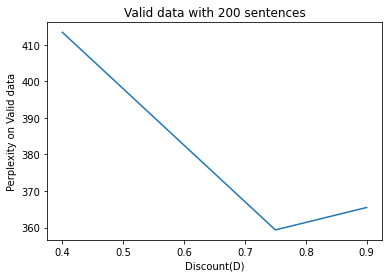

In [ ]:
import matplotlib.pyplot as plt
plt.plot(D , arr_perplexity)
plt.xlabel("Discount(D)")
plt.ylabel("Perplexity on Valid data")
plt.title("Valid data with 200 sentences")
plt.show()

# Test 

In [ ]:
list_couple_bigram_wikitext_2_test = []
Number_word_of_test_data =[]
for line in word_data_wikitext_2_test:
    sent = line.split()
    Number_word_of_test_data.append(len(sent))
    for i in range(len(sent) - 1):
        list_couple_bigram_wikitext_2_test.append((sent[i] , sent[i+1]))
    list_couple_bigram_wikitext_2_test.append('\n')

In [ ]:
def Test_on_Test_data(dict_bigram_proba_wiki_2_train , D):
    arr_proba = []
    temp_proba =[]
    for bigram in tqdm(list_couple_bigram_wikitext_2_test):
        if  bigram != '\n' and len(bigram) > 1:
            if bigram in list_bigram_data_train:
               temp_proba.append(math.log2(dict_bigram_proba_wiki_2_train[bigram]))
            else:
               temp_proba.append(math.log2((((D * dict_appear_Wi[bigram[0]])/dict_count_Wi_V[bigram[0]])/dict_sum_discounted_count_probability_Wi[bigram[0]]) * dict_count_probability_Wi[bigram[1]]))
        else:
             arr_proba.append(temp_proba)
             temp_proba = []
    perplexity_each_sentence = []
    for proba in tqdm(arr_proba):
        if len(proba) > 0:
          perplexity_each_sentence.append(pow(2 , -(np.sum(proba)/(len(proba)+1))))
    return np.sum(perplexity_each_sentence)/len(word_data_wikitext_2_test)

In [97]:
print(Test_on_Test_data(list_dict_bigram_proba_wiki_2_train[1], D[1]))

100%|██████████| 9574/9574 [00:00<00:00, 83530.63it/s]

360.5263576315478


# Debug

In [ ]:
dict_bigram_proba_wikitext_2_train = {}
for bigram in tqdm(list_bigram_data_train):
    dict_bigram_proba_wikitext_2_train[bigram] = (list_bigram_count_data_train[bigram] - 0.75) / dict_count_Wi_V[bigram[0]]

100%|██████████| 604455/604455 [00:01<00:00, 425948.42it/s]


In [ ]:
dict_missing_bigram_proba_wikitext_2_train ={}
for word in new_arr[1]:
    dict_missing_bigram_proba_wikitext_2_train[('A' , word)] = (((0.75 * dict_appear_Wi['A'])/dict_count_Wi_V['A'])/dict_sum_discounted_count_probability_Wi['A']) * dict_count_probability_Wi[word]

In [ ]:
sum = 0.0
for bigram in dict_bigram_proba_wikitext_2_train:
    if bigram[0] == 'A':
       sum = sum + dict_bigram_proba_wikitext_2_train[bigram]

In [ ]:
sum1 = 0.0
for bigram in dict_missing_bigram_proba_wikitext_2_train:
       sum1 = sum1 + dict_missing_bigram_proba_wikitext_2_train[bigram]

In [ ]:
sum+sum1

1.0